# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [170]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [171]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [172]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [173]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [174]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [175]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [176]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [177]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [178]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [179]:
#to drop a row having nan https://stackoverflow.com/questions/13413590
project_data=project_data.dropna(subset=['teacher_prefix'])

In [180]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [181]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [182]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.\r\nMy students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things. \r\nAll of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.\r\nThis will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They lea

In [183]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.  My students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things.   All of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.  This will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They learn so 

In [184]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My wonderful students are 3 4 and 5 years old We are located in a small town outside of Charlotte NC All of my 22 students are children of school district employees My students are bright energetic and they love to learn They love hands on activities that get them moving Like most preschoolers they enjoy music and creating different things All of my students come from wonderful families that are very supportive of our classroom Our parents enjoy watching their children is growth as much as we do These materials will help me teach my students all about the life cycle of a butterfly We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis After a few weeks they will emerge from the chrysalis as beautiful butterflies We already have a net for the chrysalises but we still need the caterpillars and feeding station This will be an unforgettable experience for my students My student absolutely love hands on materials They learn so much from getting to touch and man

In [185]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [186]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109245/109245 [01:12<00:00, 1508.54it/s]


In [187]:
# after preprocesing
preprocessed_essays[20000]

'my wonderful students 3 4 5 years old we located small town outside charlotte nc all 22 students children school district employees my students bright energetic love learn they love hands activities get moving like preschoolers enjoy music creating different things all students come wonderful families supportive classroom our parents enjoy watching children growth much these materials help teach students life cycle butterfly we watch painted lady caterpillars grow bigger build chrysalis after weeks emerge chrysalis beautiful butterflies we already net chrysalises still need caterpillars feeding station this unforgettable experience students my student absolutely love hands materials they learn much getting touch manipulate different things the supporting materials i selected help students understand life cycle exploration nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [188]:
# similarly you can preprocess the titles also

In [189]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109245/109245 [00:03<00:00, 33720.44it/s]


## 1.5 Preparing data for models

In [190]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [191]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Care_Hunger', 'Warmth', 'History_Civics', 'Music_Arts', 'Math_Science', 'AppliedLearning', 'SpecialNeeds', 'Literacy_Language', 'Health_Sports']
Shape of matrix after one hot encodig  (109245, 9)


In [192]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['AppliedSciences', 'SpecialNeeds', 'College_CareerPrep', 'EnvironmentalScience', 'PerformingArts', 'Health_Wellness', 'History_Geography', 'VisualArts', 'FinancialLiteracy', 'Literature_Writing', 'Warmth', 'Other', 'CommunityService', 'SocialSciences', 'Civics_Government', 'NutritionEducation', 'Mathematics', 'Literacy', 'Music', 'Health_LifeScience', 'Gym_Fitness', 'EarlyDevelopment', 'ESL', 'ForeignLanguages', 'Extracurricular', 'Care_Hunger', 'TeamSports', 'ParentInvolvement', 'CharacterEducation', 'Economics']
Shape of matrix after one hot encodig  (109245, 30)


In [193]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [194]:
#Vectorizing Categorical data:State

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(project_data['school_state'].values)
print(vectorizer1.get_feature_names())


state_one_hot = vectorizer1.transform(project_data['school_state'].values)

print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['MI', 'TN', 'NC', 'RI', 'DE', 'MO', 'IA', 'WV', 'DC', 'CT', 'CO', 'AR', 'GA', 'NY', 'PA', 'WA', 'CA', 'MT', 'MA', 'NJ', 'KY', 'IN', 'OK', 'HI', 'KS', 'IL', 'MN', 'AK', 'AL', 'SD', 'NE', 'OR', 'WI', 'VA', 'NH', 'SC', 'TX', 'MD', 'MS', 'AZ', 'NV', 'FL', 'ME', 'NM', 'UT', 'VT', 'LA', 'ID', 'ND', 'OH', 'WY']
Shape of matrix after one hot encodig  (109245, 51)


In [195]:
#Vectorizing Categorical data:teacher_prefix

def partition(i):
    return i.replace('.', '')

prefix = project_data['teacher_prefix']
actual_prefix = prefix.map(partition)
project_data['teacher_prefix'] = actual_prefix

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
my_counter.update(project_data['teacher_prefix'])
        
#dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_dict = dict(my_counter)
sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))

#we use count vectorizer to convert the values into one hot encoded features

vectorizer1 = CountVectorizer(vocabulary=list(sorted_teacher_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(project_data['teacher_prefix'].values)
print(vectorizer1.get_feature_names())


prefix_one_hot = vectorizer1.transform(project_data['teacher_prefix'].values)

print("Shape of matrix after one hot encodig ",prefix_one_hot.shape)

['Ms', 'Dr', 'Mrs', 'Teacher', 'Mr']
Shape of matrix after one hot encodig  (109245, 5)


In [196]:
#Vectorizing Categorical data:project_grade_category

def partition(i):
    return i.replace('-', '_')

prefix = project_data['project_grade_category']
actual_prefix = prefix.map(partition)
project_data['project_grade_category'] = actual_prefix

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())
    
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

#https://thispointer.com/different-ways-to-remove-a-key-from-dictionary-in-python/
if "Grades" in sorted_grade_dict:
    del sorted_grade_dict["Grades"]

# we use count vectorizer to convert the values into one hot encoded features
vectorizer3 = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer3.fit(project_data['project_grade_category'].values)
print(vectorizer3.get_feature_names())


grade_one_hot = vectorizer3.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grade_one_hot.shape)

['3_5', 'PreK_2', '9_12', '6_8']
Shape of matrix after one hot encodig  (109245, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [197]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109245, 16623)


In [198]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [199]:
#Bag of Words on project_title
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (109245, 3222)


#### 1.5.2.2 TFIDF vectorizer

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109245, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [201]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [202]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [203]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 109245/109245 [00:42<00:00, 2542.27it/s]

109245
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [204]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [205]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 109245/109245 [04:51<00:00, 375.37it/s]

109245
300


In [206]:
# Similarly you can vectorize for title also

In [207]:
#TFIDF Vectorizer on project_title
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (109245, 3222)


In [208]:
#Using Pretrained Models: AVG W2V on project_title

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))    

100%|██████████| 109245/109245 [00:01<00:00, 59880.23it/s]

109245
300


In [209]:
#Using Pretrained Models: TFIDF weighted W2V on project_title

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title.append(vector)

print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))


100%|██████████| 109245/109245 [00:03<00:00, 27786.40it/s]

109245
300


### 1.5.3 Vectorizing Numerical features

In [210]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [211]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" +str(price_scalar.mean_[0]), "Standard deviation :" +str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean :298.1152448166964 Standard deviation :367.49642545627506


In [212]:
price_standardized

array([[-0.39052147],
       [ 0.00240752],
       [ 0.5952024 ],
       ...,
       [-0.1582471 ],
       [-0.61242839],
       [-0.51215531]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [213]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109245, 9)
(109245, 30)
(109245, 16623)
(109245, 1)


In [214]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109245, 16663)

__ Computing Sentiment Scores__

In [215]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, pos: 0.245, compound: 0.9975, neu: 0.745, 

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [216]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [217]:
project_data1 = project_data
project_data1.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0             Ms   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK_2   
1           FL        2016-10-25 09:22:10             Grades 6_8   
2           AZ        2016-08-31 12:03:56             Grades 6_8   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   
2                 Health_Sports    Health_Wellness TeamSports   

                                               essay  quantity   price  
0  My students are English learners that are work...        23  154.60  
1  Our students arrive to our school eager to lea...         1  299.00  
2  \r\n\"True champions aren't always the ones th...        22  516.85

In [218]:
y = project_data1['project_is_approved'].values
project_data1.drop(['project_is_approved'], axis=1, inplace=True)
project_data1.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK_2   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects   clean_categories  \
0                                             0  Literacy_Language   

  clean_subcategories                                              essay  \
0        ESL Literacy  My students are English learners that are work...   

   quantity  price  
0        23  154.6

In [219]:
X = project_data1
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [220]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3>2.2.1 Normalizing the numerical features: Price</h3>

In [221]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 1) (73194,)
(36051, 1) (36051,)


In [222]:
f_name = ['price']

<h3>2.2.2 Normalizing the numerical features: teacher_number_of_previously_posted_projects</h3>

In [223]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_tnppp_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnppp_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_tnppp_norm.shape, y_train.shape)
print(X_test_tnppp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 1) (73194,)
(36051, 1) (36051,)


In [224]:
f_name.extend(['tnpp'])

<h3>2.2.3 one hot encoding the catogorical features:clean_categories</h3>

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)

X_train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)
print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 9) (73194,)
(36051, 9) (36051,)
['Care_Hunger', 'Warmth', 'History_Civics', 'Music_Arts', 'Math_Science', 'AppliedLearning', 'SpecialNeeds', 'Literacy_Language', 'Health_Sports']


In [226]:
f_name.extend(vectorizer.get_feature_names())

<h3>2.2.4 one hot encoding the catogorical features: clean_subcategories</h3>

In [227]:
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
X_train_sub_categories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_sub_categories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
print("After vectorizations")
print(X_train_sub_categories_ohe.shape, y_train.shape)
print(X_test_sub_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 30) (73194,)
(36051, 30) (36051,)
['AppliedSciences', 'SpecialNeeds', 'College_CareerPrep', 'EnvironmentalScience', 'PerformingArts', 'Health_Wellness', 'History_Geography', 'VisualArts', 'FinancialLiteracy', 'Literature_Writing', 'Warmth', 'Other', 'CommunityService', 'SocialSciences', 'Civics_Government', 'NutritionEducation', 'Mathematics', 'Literacy', 'Music', 'Health_LifeScience', 'Gym_Fitness', 'EarlyDevelopment', 'ESL', 'ForeignLanguages', 'Extracurricular', 'Care_Hunger', 'TeamSports', 'ParentInvolvement', 'CharacterEducation', 'Economics']


In [228]:
f_name.extend(vectorizer.get_feature_names())

<h3>2.2.5 one hot encoding the catogorical features: school_state</h3>

In [229]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 51) (73194,)
(36051, 51) (36051,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [230]:
f_name.extend(vectorizer.get_feature_names())

<h3>2.2.6 one hot encoding the catogorical features: teacher_prefix</h3>

In [231]:
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 5) (73194,)
(36051, 5) (36051,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [232]:
f_name.extend(vectorizer.get_feature_names())

<h3>2.2.7 one hot encoding the catogorical features: project_grade_category</h3>

In [233]:
#one hot encoding of project_grade_category for X_train
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in X_train['project_grade_category'].values:
    my_counter.update(word.split())
    
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

#https://thispointer.com/different-ways-to-remove-a-key-from-dictionary-in-python/
if "Grades" in sorted_grade_dict:
    del sorted_grade_dict["Grades"]


#Vectorizing Categorical data:project_grade_category

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())


X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
print(X_train_grade_ohe.shape, y_train.shape)

['3_5', 'PreK_2', '9_12', '6_8']
(73194, 4) (73194,)


In [234]:
f_name.extend(vectorizer.get_feature_names())

In [235]:
#one hot encoding of project_grade_category for X_test
my_counter = Counter()
for word in X_test['project_grade_category'].values:
    my_counter.update(word.split())
    
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

#https://thispointer.com/different-ways-to-remove-a-key-from-dictionary-in-python/
if "Grades" in sorted_grade_dict:
    del sorted_grade_dict["Grades"]


#Vectorizing Categorical data:project_grade_category

# we use count vectorizer to convert the values into one hot encoded features
#vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
#vectorizer.transform(X_test['project_grade_category'].values)
print(vectorizer.get_feature_names())


X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)
print(X_test_grade_ohe.shape, y_test.shape)

['3_5', 'PreK_2', '9_12', '6_8']
(36051, 4) (36051,)


In [236]:
print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 4) (73194,)
(36051, 4) (36051,)
['3_5', 'PreK_2', '9_12', '6_8']


In [237]:
f_name_bow = f_name

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [238]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3>2.3.1.1 Text preprocessing</h3>

In [239]:
#text preprocessing on X_train datasets
from tqdm import tqdm
X_train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_train_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 73194/73194 [00:48<00:00, 1496.01it/s]


In [240]:
#text preprocessing on X_test datasets
X_test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_test_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 36051/36051 [00:24<00:00, 1497.72it/s]


<h3>2.3.1.2 Vectorizing Text data:Bag of words</h3>

In [241]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train_preprocessed_essays) # fit has to happen only on train data

X_train_text_bow = vectorizer.transform(X_train_preprocessed_essays)
X_test_text_bow = vectorizer.transform(X_test_preprocessed_essays)

print("After vectorizations")
print(X_train_text_bow.shape, y_train.shape)
print(X_test_text_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 14151) (73194,)
(36051, 14151) (36051,)


In [242]:
f_name_bow.extend(vectorizer.get_feature_names())

<h3>2.3.1.3 Vectorizing Text data: tfidf</h3>

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train_preprocessed_essays) # fit has to happen only on train data
X_train_text_tfidf = vectorizer.transform(X_train_preprocessed_essays)
X_test_text_tfidf = vectorizer.transform(X_test_preprocessed_essays)

print("After vectorizations")
print(X_train_text_tfidf.shape, y_train.shape)
print(X_test_text_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 14151) (73194,)
(36051, 14151) (36051,)


<h3>2.3.1.4 Vectorizing Text data: avg w2v</h3>

In [244]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [245]:
# average Word2Vec for X_train
X_train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors.append(vector)

print(len(X_train_avg_w2v_vectors))
print(len(X_train_avg_w2v_vectors[0]))

100%|██████████| 73194/73194 [00:27<00:00, 2665.98it/s]

73194
300


In [246]:
# average Word2Vec for X_test
X_test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors.append(vector)

print(len(X_test_avg_w2v_vectors))
print(len(X_test_avg_w2v_vectors[0]))

100%|██████████| 36051/36051 [00:13<00:00, 2673.38it/s]

36051
300


<h3>2.3.1.5 Vectorizing Text data: tfidf weighted w2v</h3>

In [247]:
#tfidf w2v for X_train

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit_transform(X_train_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

X_train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors.append(vector)

print(len(X_train_tfidf_w2v_vectors))
print(len(X_train_tfidf_w2v_vectors[0]))

100%|██████████| 73194/73194 [02:52<00:00, 425.14it/s]

73194
300


In [248]:
#tfidf w2v for X_test

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model.transform(X_test_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

X_test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors.append(vector)

print(len(X_test_tfidf_w2v_vectors))
print(len(X_test_tfidf_w2v_vectors[0]))

100%|██████████| 36051/36051 [01:24<00:00, 428.88it/s]

36051
300


<h3>2.3.2.1 Title preprocessing</h3>

In [249]:
#Title preprocessing on X_train datasets
from tqdm import tqdm
X_train_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_train_preprocessed_titles.append(sent.lower().strip())

100%|██████████| 73194/73194 [00:02<00:00, 33228.89it/s]


In [250]:
#title preprocessing on X_test datasets
from tqdm import tqdm
X_test_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_test_preprocessed_titles.append(sent.lower().strip())

100%|██████████| 36051/36051 [00:01<00:00, 30972.51it/s]


<h3>2.3.2.2 Vectorizing project_titles data:Bag of words</h3>

In [251]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train_preprocessed_titles) # fit has to happen only on train data

X_train_titles_bow = vectorizer.transform(X_train_preprocessed_titles)
X_test_titles_bow = vectorizer.transform(X_test_preprocessed_titles)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 2530) (73194,)
(36051, 2530) (36051,)


In [252]:
f_name_bow.extend(vectorizer.get_feature_names())

<h3>2.3.2.3 Vectorizing Text data: tfidf</h3>

In [253]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train_preprocessed_titles) # fit has to happen only on train data
X_train_titles_tfidf = vectorizer.transform(X_train_preprocessed_titles)
X_test_titles_tfidf = vectorizer.transform(X_test_preprocessed_titles)

print("After vectorizations")
print(X_train_titles_tfidf.shape, y_train.shape)
print(X_test_titles_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 2530) (73194,)
(36051, 2530) (36051,)


In [254]:
f_name_tfidf = f_name_bow

<h3>2.3.2.4 Vectorizing project_title data: avg w2v</h3>

In [256]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [257]:
# average Word2Vec for X_train
X_train_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors_titles.append(vector)

print(len(X_train_avg_w2v_vectors_titles))
print(len(X_train_avg_w2v_vectors_titles[0]))

100%|██████████| 73194/73194 [00:01<00:00, 59675.12it/s]

73194
300


In [258]:
# average Word2Vec for X_test
X_test_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors_titles.append(vector)

print(len(X_test_avg_w2v_vectors_titles))
print(len(X_test_avg_w2v_vectors_titles[0]))

100%|██████████| 36051/36051 [00:00<00:00, 62706.25it/s]

36051
300


<h3>2.3.2.5 Vectorizing project_title data: tfidf weighted w2v</h3>

In [259]:
#tfidf w2v for X_train

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit_transform(X_train_preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

X_train_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_titles.append(vector)

print(len(X_train_tfidf_w2v_vectors_titles))
print(len(X_train_tfidf_w2v_vectors_titles[0]))

100%|██████████| 73194/73194 [00:03<00:00, 21483.97it/s]

73194
300


In [260]:
#tfidf w2v for X_test

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model.transform(X_test_preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

X_test_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_titles.append(vector)

print(len(X_test_tfidf_w2v_vectors_titles))
print(len(X_test_tfidf_w2v_vectors_titles[0]))

100%|██████████| 36051/36051 [00:01<00:00, 20963.70it/s]

36051
300


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h3>Concatinating all the features:model1-BOW</h3>

In [261]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_m1 = hstack((X_train_price_norm, X_train_tnppp_norm, X_train_categories_ohe, X_train_sub_categories_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_text_bow, X_train_titles_bow))
         
X_te_m1 = hstack((X_test_price_norm, X_test_tnppp_norm, X_test_categories_ohe, X_test_sub_categories_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_text_bow, X_test_titles_bow))

print("Final Data matrix")
print(X_tr_m1.shape, y_train.shape)
print(X_te_m1.shape, y_test.shape)
print("="*100)

Final Data matrix
(73194, 16782) (73194,)
(36051, 16782) (36051,)


<h3>Concatinating all the features:model2-TFIDF</h3>

In [262]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr_m2 = hstack((X_train_price_norm, X_train_tnppp_norm, X_train_categories_ohe, X_train_sub_categories_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_text_tfidf, X_train_titles_tfidf))
              
X_te_m2 = hstack((X_test_price_norm, X_test_tnppp_norm, X_test_categories_ohe, X_test_sub_categories_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_text_tfidf, X_test_titles_tfidf))

print("Final Data matrix")
print(X_tr_m2.shape, y_train.shape)
print(X_te_m2.shape, y_test.shape)
print("="*100)

Final Data matrix
(73194, 16782) (73194,)
(36051, 16782) (36051,)


<h3>Concatinating all the features:model3-AVG W2V</h3>

In [263]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr_m3 = hstack((X_train_categories_ohe, X_train_sub_categories_ohe, X_train_teacher_ohe, X_train_state_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm, X_train_avg_w2v_vectors, X_train_avg_w2v_vectors_titles))

X_te_m3 = hstack((X_test_categories_ohe, X_test_sub_categories_ohe, X_test_teacher_ohe, X_test_state_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm, X_test_avg_w2v_vectors, X_test_avg_w2v_vectors_titles))

print("Final Data matrix")
print(X_tr_m3.shape, y_train.shape)
print(X_te_m3.shape, y_test.shape)
print("="*100)

Final Data matrix
(73194, 701) (73194,)
(36051, 701) (36051,)


<h3>Concatinating all the features:model4-TFIDF WEIGHTED W2V</h3>

In [264]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_m4 = hstack((X_train_categories_ohe, X_train_sub_categories_ohe, X_train_teacher_ohe, X_train_state_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm, X_train_tfidf_w2v_vectors, X_train_tfidf_w2v_vectors_titles))

X_te_m4 = hstack((X_test_categories_ohe, X_test_sub_categories_ohe, X_test_teacher_ohe, X_test_state_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm, X_test_tfidf_w2v_vectors, X_test_tfidf_w2v_vectors_titles))

print("Final Data matrix")
print(X_tr_m4.shape, y_train.shape)
print(X_te_m4.shape, y_test.shape)
print("="*100)

Final Data matrix
(73194, 701) (73194,)
(36051, 701) (36051,)


### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [265]:
from scipy.sparse import hstack
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

X_tr_m1 = csr_matrix(X_tr_m1)
X_te_m1 = csr_matrix(X_te_m1)


In [224]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

neigh = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[5, 10, 50, 100], 'min_samples_split':[5, 10, 100, 500]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_m1, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [225]:
train_auc

array([0.62179257, 0.62172019, 0.62119649, 0.61964948, 0.69682139,
       0.69510693, 0.68356436, 0.66838597, 0.96771435, 0.95739302,
       0.8896514 , 0.80717912, 0.99186888, 0.98571064, 0.93262698,
       0.83206757])

In [226]:
#making dataframe for train_auc values with max_depth & min_sample_split:
d = {'min_samples_split': [5, 10, 100, 500],
    'max_depth = 5': [0.62179257, 0.62172019, 0.62119649, 0.61964948],
    'max_depth = 10': [0.69682139, 0.69510693, 0.68356436, 0.66838597],
    'max_depth = 50': [0.96771435, 0.95739302, 0.8896514 , 0.80717912],
    'max_depth = 100': [0.99186888, 0.98571064, 0.93262698, 0.83206757]}
df = pd.DataFrame(d).set_index('min_samples_split')
df

max_depth = 10  max_depth = 100  max_depth = 5  \
min_samples_split                                                   
5                        0.696821         0.991869       0.621793   
10                       0.695107         0.985711       0.621720   
100                      0.683564         0.932627       0.621196   
500                      0.668386         0.832068       0.619649   

                   max_depth = 50  
min_samples_split                  
5                        0.967714  
10                       0.957393  
100                      0.889651  
500                      0.807179

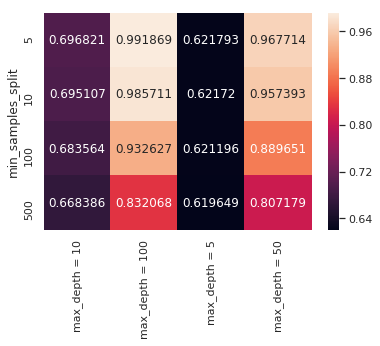

In [227]:
#heatmap for train_auc in each cases:
import seaborn as sns; sns.set()

sns.set(font_scale = 1.0)
sns.heatmap(df, annot=True, fmt='g')

In [228]:
cv_auc

array([0.60688918, 0.60680874, 0.60678744, 0.60686996, 0.62014721,
       0.62058228, 0.61938849, 0.62341809, 0.57339548, 0.57206119,
       0.59298053, 0.60812984, 0.55973691, 0.56105182, 0.58041888,
       0.59844128])

In [229]:
#cv_auc values in each cases:
d = {'min_samples_split': [5, 10, 100, 500],
     'max_depth = 5': [0.60688918, 0.60680874, 0.60678744, 0.60686996],
     'max_depth = 10': [0.62014721, 0.62058228, 0.61938849, 0.62341809],
     'max_depth = 50': [0.57339548, 0.57206119, 0.59298053, 0.60812984],
     'max_depth = 100': [0.55973691, 0.56105182, 0.58041888, 0.59844128]}
df = pd.DataFrame(d).set_index('min_samples_split')
df

max_depth = 10  max_depth = 100  max_depth = 5  \
min_samples_split                                                   
5                        0.620147         0.559737       0.606889   
10                       0.620582         0.561052       0.606809   
100                      0.619388         0.580419       0.606787   
500                      0.623418         0.598441       0.606870   

                   max_depth = 50  
min_samples_split                  
5                        0.573395  
10                       0.572061  
100                      0.592981  
500                      0.608130

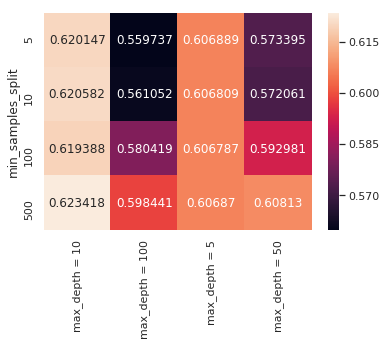

In [230]:
#heatmap for cv_auc in each cases:
import seaborn as sns; sns.set()

sns.set(font_scale = 1.0)
sns.heatmap(df, annot=True, fmt='g')

In [231]:
#1.from the heatmap plot we choose max_depth and min_samples_split such that we will have maximum AUC on cv data.
#2.Gap between cv_auc and train_auc should be less
# for max_depth = 10 and min_samples_split = 10, we will have maximum AUC on cv data
best_max_depth = 10
best_min_samples_split = 10

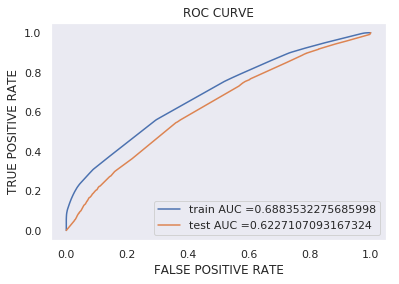

In [266]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

neigh = DecisionTreeClassifier(max_depth=10, min_samples_split=10, class_weight='balanced')
neigh.fit(X_tr_m1, y_train)

y_train_pred = neigh.predict_proba(X_tr_m1)[:,1]    
y_test_pred = neigh.predict_proba(X_te_m1)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC CURVE")
plt.grid()
plt.show()

In [267]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999550405429283 for threshold 0.464


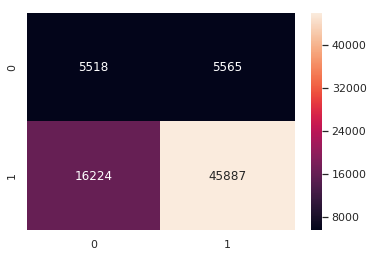

In [268]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
conf_mat_data = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.set(font_scale = 1.0)
sns.heatmap(conf_mat_data, annot=True, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24551720814702188 for threshold 0.464


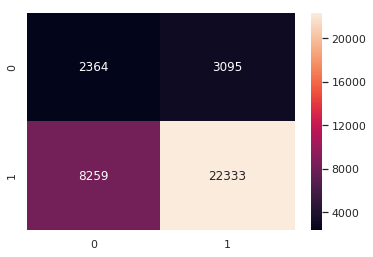

In [269]:
print("Test confusion matrix")
sns.set(font_scale = 1.0)
conf_mat_data = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(conf_mat_data, annot=True, fmt='g')

In [270]:
#essay text for the false positive datapoints
y_pred_new = predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)
y_test_new = y_test
y_test_new = y_test_new.tolist()
new_X_test = X_test
new_X_test['y_test_new'] = y_test
new_X_test['y_pred_new'] = y_pred_new
text_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'essay'].values

the maximum value of tpr*(1-fpr) 0.24551720814702188 for threshold 0.464


In [271]:
text_data.shape

(3095,)

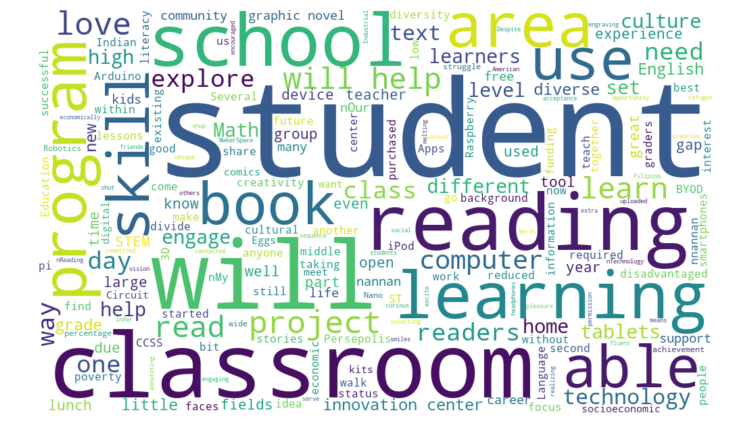

In [275]:
#https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text_data))
fig = plt.figure(
    figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

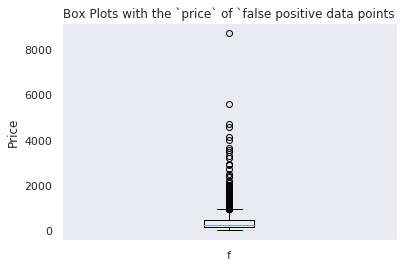

In [277]:
#Plot the box plot with the `price` of these `false positive data points
price_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'price'].values
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([price_data])
plt.title('Box Plots with the `price` of `false positive data points')
plt.xticks([1],("false_data_points"))
plt.ylabel('Price')
plt.grid()
plt.show()

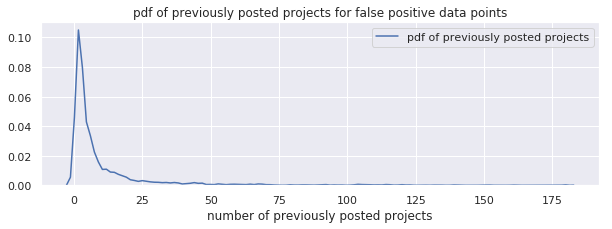

In [278]:
tnppp_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'teacher_number_of_previously_posted_projects'].values
#Plotting the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
plt.figure(figsize=(10,3))
sns.distplot(tnppp_data, hist=False, label="pdf of previously posted projects")
plt.title('pdf of previously posted projects for false positive data points')
plt.xlabel('number of previously posted projects')
plt.legend()
plt.show()

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

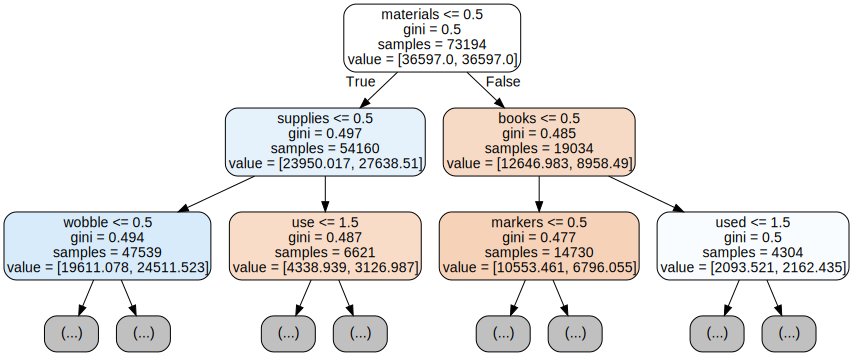

In [146]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(neigh, out_file=None, max_depth=2, feature_names=f_name_bow, filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [279]:
X_tr_m2 = csr_matrix(X_tr_m2)
X_te_m2 = csr_matrix(X_te_m2)

In [149]:
from sklearn.model_selection import GridSearchCV
neigh = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[5, 10, 50, 100], 'min_samples_split':[5, 10, 100, 500]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_m2, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 


In [150]:
train_auc

array([0.62654151, 0.62650174, 0.62607714, 0.62433062, 0.70590447,
       0.70450125, 0.6944075 , 0.68245236, 0.97988467, 0.9728453 ,
       0.91042631, 0.82915666, 0.99727661, 0.99397472, 0.95117253,
       0.85218779])

In [151]:
#making dataframe for train_auc values with max_depth & min_sample_split:
d = {'min_samples_split': [5, 10, 100, 500],
    'max_depth = 5': [0.62654151, 0.62650174, 0.62607714, 0.62433062],
    'max_depth = 10': [0.70590447, 0.70450125, 0.6944075, 0.68245236],
    'max_depth = 50': [0.97988467, 0.9728453, 0.91042631, 0.82915666],
    'max_depth = 100': [0.99727661, 0.99397472, 0.95117253, 0.85218779]}
df = pd.DataFrame(d).set_index('min_samples_split')
df

max_depth = 10  max_depth = 100  max_depth = 5  \
min_samples_split                                                   
5                        0.705904         0.997277       0.626542   
10                       0.704501         0.993975       0.626502   
100                      0.694407         0.951173       0.626077   
500                      0.682452         0.852188       0.624331   

                   max_depth = 50  
min_samples_split                  
5                        0.979885  
10                       0.972845  
100                      0.910426  
500                      0.829157

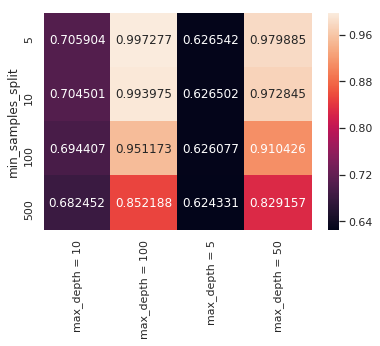

In [152]:
#heatmap for train_auc in each cases:
import seaborn as sns; sns.set()

sns.set(font_scale = 1.0)
sns.heatmap(df, annot=True, fmt='g')

In [153]:
cv_auc

array([0.60409158, 0.60416859, 0.60407176, 0.60542332, 0.62063873,
       0.6204913 , 0.62116097, 0.62519238, 0.55196138, 0.55421488,
       0.57279675, 0.59551897, 0.54074603, 0.54481752, 0.56112645,
       0.58698028])

In [154]:
#cv_auc values in each cases:
d = {'min_samples_split': [5, 10, 100, 500],
     'max_depth = 5': [0.60409158, 0.60416859, 0.60407176, 0.60542332],
     'max_depth = 10': [0.62063873, 0.6204913, 0.62116097, 0.62519238],
     'max_depth = 50': [0.55196138, 0.55421488, 0.57279675, 0.59551897],
     'max_depth = 100': [0.54074603, 0.54481752, 0.56112645, 0.58698028]}
df = pd.DataFrame(d).set_index('min_samples_split')
df

max_depth = 10  max_depth = 100  max_depth = 5  \
min_samples_split                                                   
5                        0.620639         0.540746       0.604092   
10                       0.620491         0.544818       0.604169   
100                      0.621161         0.561126       0.604072   
500                      0.625192         0.586980       0.605423   

                   max_depth = 50  
min_samples_split                  
5                        0.551961  
10                       0.554215  
100                      0.572797  
500                      0.595519

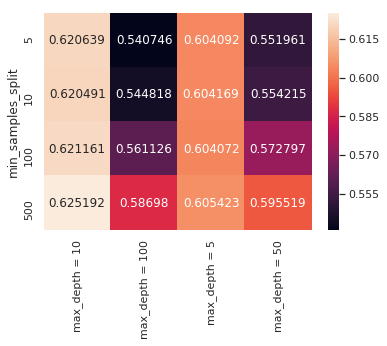

In [155]:
#heatmap for cv_auc in each cases:
import seaborn as sns; sns.set()

sns.set(font_scale = 1.0)
sns.heatmap(df, annot=True, fmt='g')

In [156]:
# from the heatmap plot we choose max_depth and min_samples_split such that will have maximum AUC on cv data.
# for max_depth = 10 and min_samples_split = 500, we will have maximum AUC on cv data
best_max_depth = 10
best_min_samples_split = 500

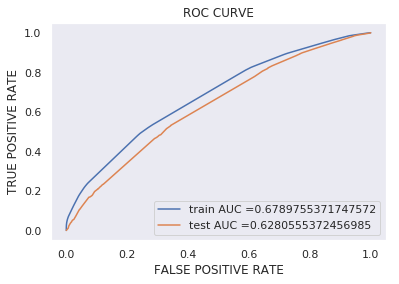

In [304]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

neigh = DecisionTreeClassifier(max_depth=10 , min_samples_split=500, class_weight='balanced')
neigh.fit(X_tr_m2, y_train)

y_train_pred = neigh.predict_proba(X_tr_m2)[:,1]    
y_test_pred = neigh.predict_proba(X_te_m2)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC CURVE")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24629618538077372 for threshold 0.475


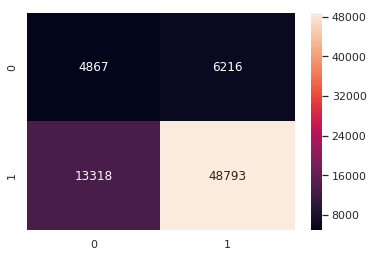

In [305]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
conf_mat_data = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.set(font_scale = 1.0)
sns.heatmap(conf_mat_data, annot=True, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2358878308854754 for threshold 0.475


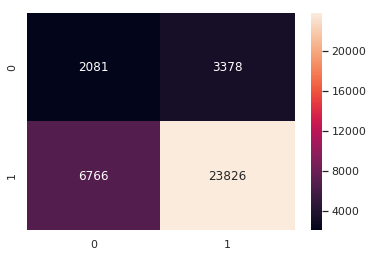

In [306]:
print("Test confusion matrix")
sns.set(font_scale = 1.0)
conf_mat_data = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(conf_mat_data, annot=True, fmt='g')

In [307]:
#essay text for false positive datapoints
y_pred_new = predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)
new_X_test['y_pred_new'] = y_pred_new
text_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'essay'].values

the maximum value of tpr*(1-fpr) 0.2358878308854754 for threshold 0.475


In [308]:
text_data.shape

(3378,)

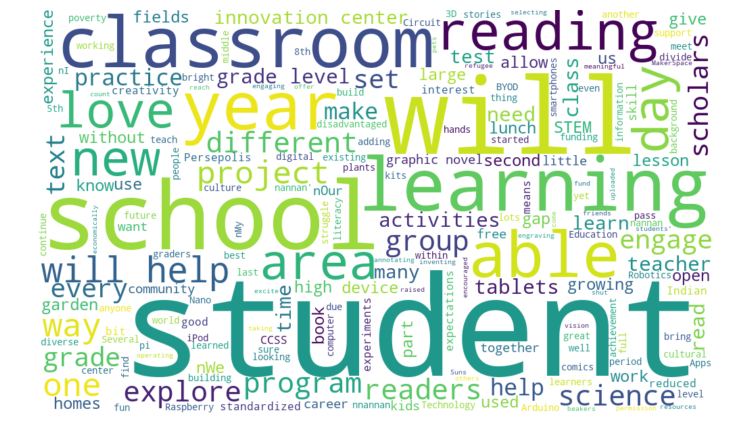

In [309]:
#https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text_data))
fig = plt.figure(
    figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

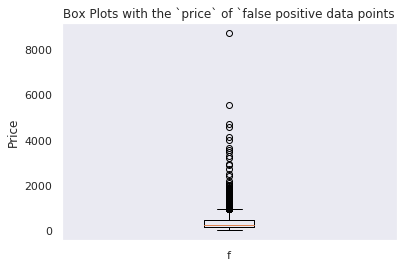

In [310]:
#Plot the box plot with the `price` of these `false positive data points
price_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'price'].values
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([price_data])
plt.title('Box Plots with the `price` of `false positive data points')
plt.xticks([1],("false_data_points"))
plt.ylabel('Price')
plt.grid()
plt.show()

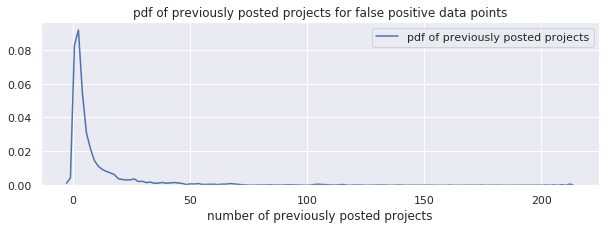

In [311]:
tnppp_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'teacher_number_of_previously_posted_projects'].values
#Plotting the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
plt.figure(figsize=(10,3))
sns.distplot(tnppp_data, hist=False, label="pdf of previously posted projects")
plt.title('pdf of previously posted projects for false positive data points')
plt.xlabel('number of previously posted projects')
plt.legend()
plt.show()

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

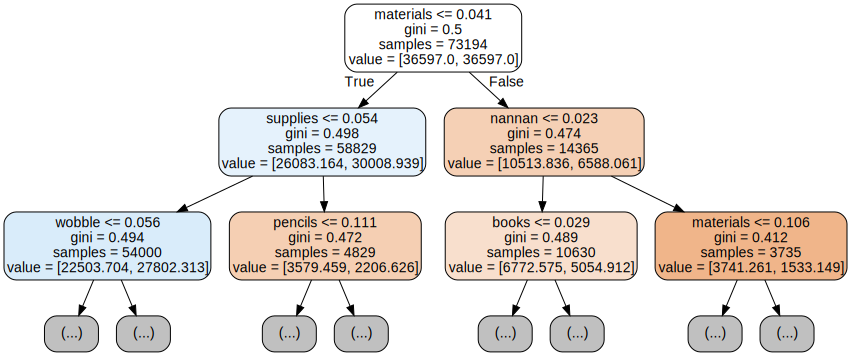

In [160]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(neigh, out_file=None, max_depth=2, feature_names=f_name_tfidf, filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [284]:
X_tr_m3 = csr_matrix(X_tr_m3)
X_te_m3 = csr_matrix(X_te_m3)

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

neigh = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[5, 10, 50, 100], 'min_samples_split':[5, 10, 100, 500]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_m3, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [105]:
train_auc

array([0.64612118, 0.64612118, 0.64612118, 0.64600204, 0.8268949 ,
       0.8256258 , 0.7936847 , 0.72911813, 0.99965397, 0.99888246,
       0.92039084, 0.75529614, 0.99997618, 0.99957782, 0.92291391,
       0.75533504])

In [113]:
#making dataframe for train_auc values with max_depth & min_sample_split:
d = {'min_samples_split': [5, 10, 100, 500],
    'max_depth = 5': [0.64612118, 0.64612118, 0.64612118, 0.64600204],
    'max_depth = 10': [0.8268949, 0.8256258 , 0.7936847, 0.72911813],
    'max_depth = 50': [0.99965397, 0.99888246, 0.92039084, 0.75529614],
    'max_depth = 100': [0.99997618, 0.99957782, 0.92291391, 0.75533504]}
df = pd.DataFrame(d).set_index('min_samples_split')
df

max_depth = 10  max_depth = 100  max_depth = 5  \
min_samples_split                                                   
5                        0.826895         0.999976       0.646121   
10                       0.825626         0.999578       0.646121   
100                      0.793685         0.922914       0.646121   
500                      0.729118         0.755335       0.646002   

                   max_depth = 50  
min_samples_split                  
5                        0.999654  
10                       0.998882  
100                      0.920391  
500                      0.755296

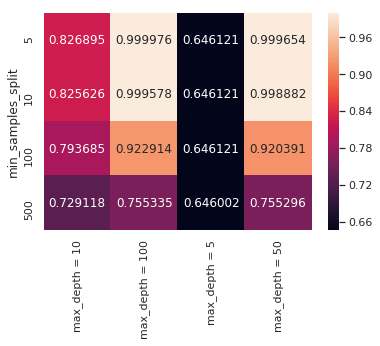

In [114]:
#heatmap for train_auc in each cases:
import seaborn as sns; sns.set()

sns.set(font_scale = 1.0)
sns.heatmap(df, annot=True, fmt='g')

In [108]:
cv_auc

array([0.60364906, 0.60364906, 0.60364906, 0.60392911, 0.56478333,
       0.56424386, 0.57267612, 0.59130505, 0.522346  , 0.52674361,
       0.54883971, 0.58251941, 0.52274708, 0.52614344, 0.54652895,
       0.58239339])

In [109]:
#cv_auc values in each cases:
d = {'min_samples_split': [5, 10, 100, 500],
     'max_depth = 5': [0.60364906, 0.60364906, 0.60364906, 0.60392911],
     'max_depth = 10': [0.56478333, 00.56424386, 0.57267612, 0.59130505],
     'max_depth = 50': [0.522346, 0.52674361, 0.54883971, 0.58251941],
     'max_depth = 100': [0.52274708, 0.52614344, 0.54652895, 0.58239339]}
df = pd.DataFrame(d).set_index('min_samples_split')
df

max_depth = 10  max_depth = 100  max_depth = 5  \
min_samples_split                                                   
5                        0.564783         0.522747       0.603649   
10                       0.564244         0.526143       0.603649   
100                      0.572676         0.546529       0.603649   
500                      0.591305         0.582393       0.603929   

                   max_depth = 50  
min_samples_split                  
5                        0.522346  
10                       0.526744  
100                      0.548840  
500                      0.582519

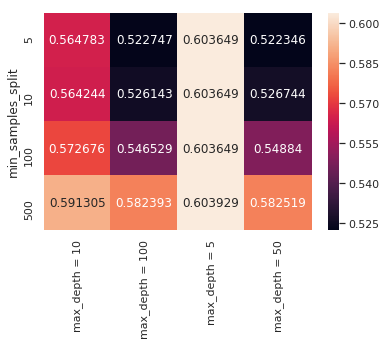

In [110]:
#heatmap for cv_auc in each cases:
import seaborn as sns; sns.set()

sns.set(font_scale = 1.0)
sns.heatmap(df, annot=True, fmt='g')

In [146]:
# from the heat plot we choose max_depth and min_samples_split such that, we will have maximum AUC on cv data.
# for max_depth = 5 and min_samples_split = 500, we will have maximum AUC on cv data
best_max_depth = 5
best_min_samples_split = 500

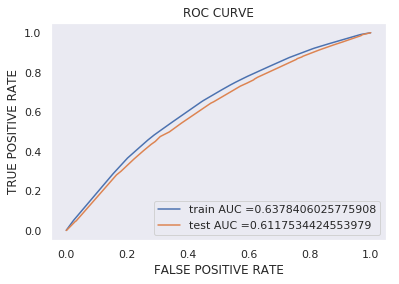

In [285]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

neigh = DecisionTreeClassifier(max_depth=5 , min_samples_split=500, class_weight='balanced')
neigh.fit(X_tr_m3, y_train)

y_train_pred = neigh.predict_proba(X_tr_m3)[:,1]    
y_test_pred = neigh.predict_proba(X_te_m3)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC CURVE")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24989878728652226 for threshold 0.473


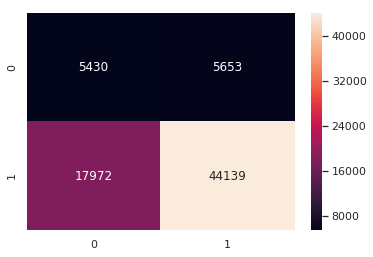

In [286]:
print("Train confusion matrix")
conf_mat_data = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.set(font_scale = 1.0)
sns.heatmap(conf_mat_data, annot=True, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24973717882487317 for threshold 0.5


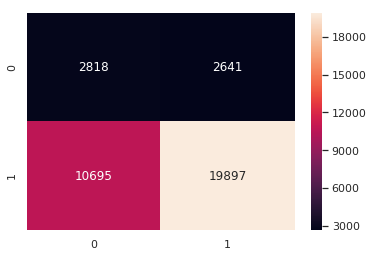

In [287]:
print("Test confusion matrix")
sns.set(font_scale = 1.0)
conf_mat_data = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(conf_mat_data, annot=True, fmt='g')

In [288]:
#essay text for false positive datapoints
y_pred_new = predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)
new_X_test['y_pred_new'] = y_pred_new
text_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'essay'].values

the maximum value of tpr*(1-fpr) 0.24973717882487317 for threshold 0.5


In [289]:
text_data.shape

(2641,)

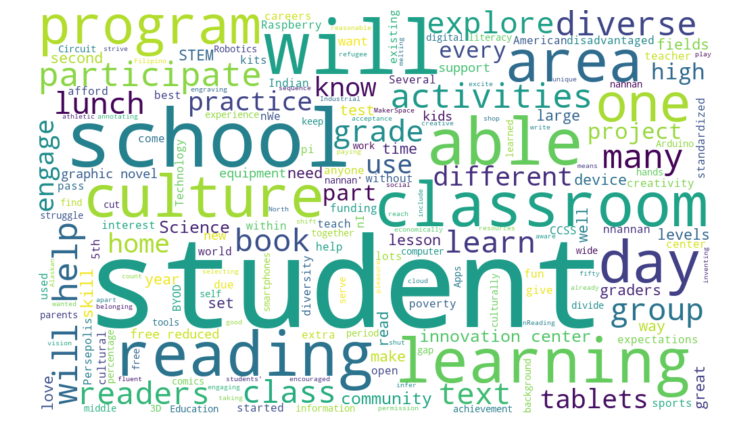

In [290]:
#https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text_data))
fig = plt.figure(
    figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

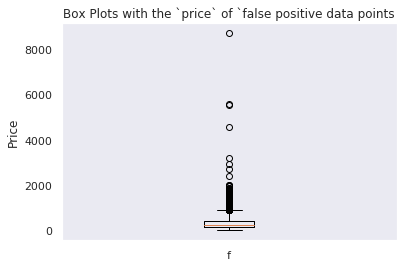

In [291]:
#Plot the box plot with the `price` of these `false positive data points
price_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'price'].values
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([price_data])
plt.title('Box Plots with the `price` of `false positive data points')
plt.xticks([1],("false_data_points"))
plt.ylabel('Price')
plt.grid()
plt.show()

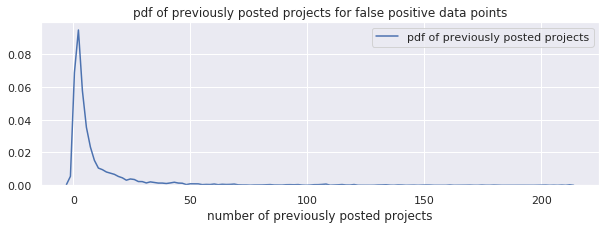

In [292]:
tnppp_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'teacher_number_of_previously_posted_projects'].values
#Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
plt.figure(figsize=(10,3))
sns.distplot(tnppp_data, hist=False, label="pdf of previously posted projects")
plt.title('pdf of previously posted projects for false positive data points')
plt.xlabel('number of previously posted projects')
plt.legend()
plt.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [293]:
X_tr_m4 = csr_matrix(X_tr_m4)
X_te_m4 = csr_matrix(X_te_m4)

In [122]:
neigh = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[5, 10, 50, 100], 'min_samples_split':[5, 10, 100, 500]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_m4, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [123]:
train_auc

array([0.65701876, 0.65701876, 0.65701876, 0.65630131, 0.83080501,
       0.82931429, 0.79929544, 0.73880928, 0.99962503, 0.99856837,
       0.92340329, 0.76157607, 0.99996466, 0.99947737, 0.9260214 ,
       0.7617724 ])

In [124]:
#making dataframe for train_auc values with max_depth & min_sample_split:
d = {'min_samples_split': [5, 10, 100, 500],
    'max_depth = 5': [0.65701876, 0.65701876, 0.65701876, 0.65630131],
    'max_depth = 10': [0.83080501, 0.82931429, 0.79929544, 0.73880928],
    'max_depth = 50': [0.99962503, 0.99856837, 0.92340329, 0.76157607],
    'max_depth = 100': [0.99996466, 0.99947737, 0.9260214, 0.7617724]}
df = pd.DataFrame(d).set_index('min_samples_split')
df

max_depth = 10  max_depth = 100  max_depth = 5  \
min_samples_split                                                   
5                        0.830805         0.999965       0.657019   
10                       0.829314         0.999477       0.657019   
100                      0.799295         0.926021       0.657019   
500                      0.738809         0.761772       0.656301   

                   max_depth = 50  
min_samples_split                  
5                        0.999625  
10                       0.998568  
100                      0.923403  
500                      0.761576

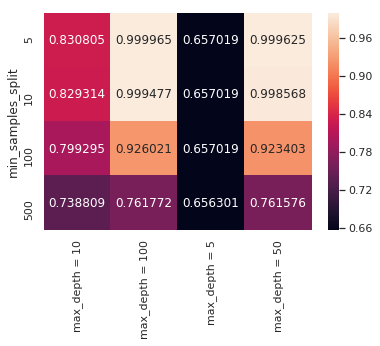

In [125]:
#heatmap for train_auc in each cases:
import seaborn as sns; sns.set()

sns.set(font_scale = 1.0)
sns.heatmap(df, annot=True, fmt='g')

In [126]:
cv_auc

array([0.61509623, 0.61509623, 0.61509623, 0.61553402, 0.57548223,
       0.57605407, 0.58483667, 0.59888552, 0.52624385, 0.52933241,
       0.55424198, 0.59164066, 0.52725373, 0.52754292, 0.55131348,
       0.59155088])

In [127]:
#cv_auc values in each cases:
d = {'min_samples_split': [5, 10, 100, 500],
     'max_depth = 5': [0.61509623, 0.61509623, 0.61509623, 0.61553402],
     'max_depth = 10': [0.57548223, 0.57605407, 0.58483667, 0.59888552],
     'max_depth = 50': [0.52624385, 0.52933241, 0.55424198, 0.59164066],
     'max_depth = 100': [0.52725373, 0.52754292, 0.55131348, 0.59155088]}
df = pd.DataFrame(d).set_index('min_samples_split')
df

max_depth = 10  max_depth = 100  max_depth = 5  \
min_samples_split                                                   
5                        0.575482         0.527254       0.615096   
10                       0.576054         0.527543       0.615096   
100                      0.584837         0.551313       0.615096   
500                      0.598886         0.591551       0.615534   

                   max_depth = 50  
min_samples_split                  
5                        0.526244  
10                       0.529332  
100                      0.554242  
500                      0.591641

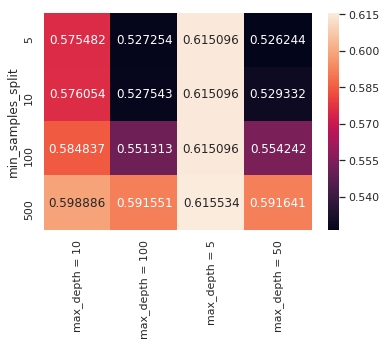

In [128]:
#heatmap for cv_auc in each cases:
import seaborn as sns; sns.set()

sns.set(font_scale = 1.0)
sns.heatmap(df, annot=True, fmt='g')

In [156]:
# from the heat plot we choose max_depth and min_samples_split such that, we will have maximum AUC on cv data.
# for max_depth = 5 and min_samples_split = 500, we will have maximum AUC on cv data
best_max_depth = 5
best_min_samples_split = 500

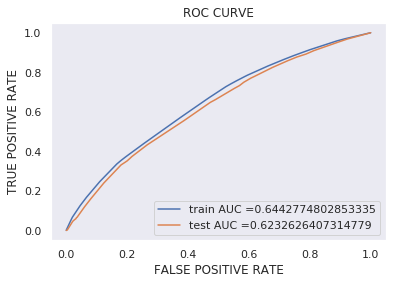

In [294]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

neigh = DecisionTreeClassifier(max_depth=5 , min_samples_split=500, class_weight='balanced')
neigh.fit(X_tr_m4, y_train)

y_train_pred = neigh.predict_proba(X_tr_m4)[:,1]    
y_test_pred = neigh.predict_proba(X_te_m4)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC CURVE")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2494174504028803 for threshold 0.502


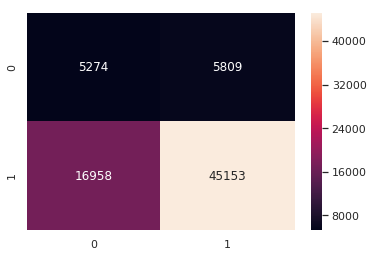

In [295]:
print("Train confusion matrix")
conf_mat_data = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.set(font_scale = 1.0)
sns.heatmap(conf_mat_data, annot=True, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24990395353716913 for threshold 0.512


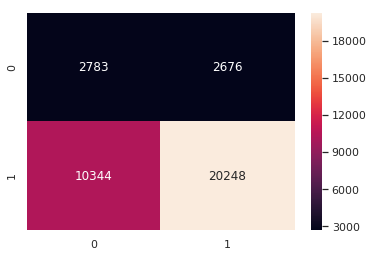

In [296]:
print("Test confusion matrix")
sns.set(font_scale = 1.0)
conf_mat_data = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(conf_mat_data, annot=True, fmt='g')

In [297]:
#essay text for false positive datapoints
y_pred_new = predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)
new_X_test['y_pred_new'] = y_pred_new
text_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'essay'].values

the maximum value of tpr*(1-fpr) 0.24990395353716913 for threshold 0.512


In [298]:
text_data.shape

(2676,)

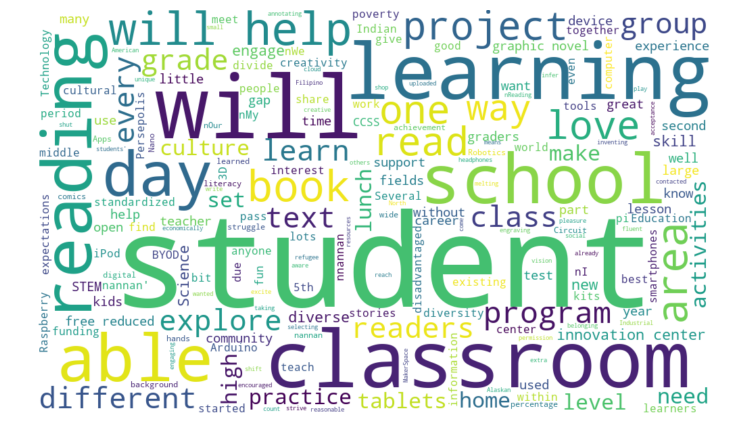

In [299]:
#https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text_data))
fig = plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

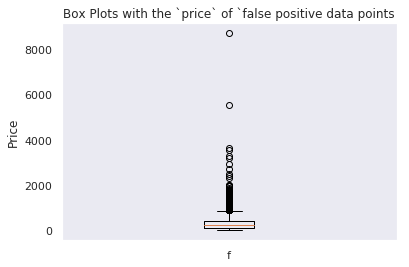

In [300]:
#Plot the box plot with the `price` of these `false positive data points
price_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'price'].values
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([price_data])
plt.title('Box Plots with the `price` of `false positive data points')
plt.xticks([1],("false_data_points"))
plt.ylabel('Price')
plt.grid()
plt.show()

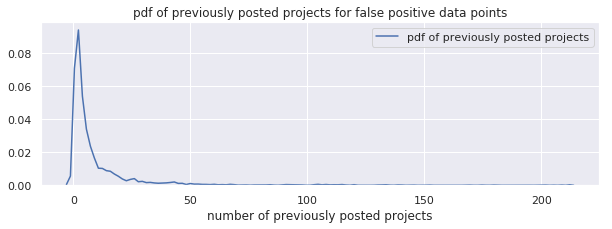

In [301]:
tnppp_data = new_X_test.loc[(new_X_test['y_test_new']==0) & (new_X_test['y_pred_new']==1), 'teacher_number_of_previously_posted_projects'].values
#Plotting the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
plt.figure(figsize=(10,3))
sns.distplot(tnppp_data, hist=False, label="pdf of previously posted projects")
plt.title('pdf of previously posted projects for false positive data points')
plt.xlabel('number of previously posted projects')
plt.legend()
plt.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [136]:
from sklearn.feature_selection import SelectKBest, chi2

print(X_tr_m2.shape)
print(X_te_m2.shape)
print('='*50)
sel = SelectKBest(chi2, k=5000).fit(X_tr_m2, y_train)
X_tr_m2_new = sel.transform(X_tr_m2)
X_te_m2_new = sel.transform(X_te_m2)
print(X_tr_m2_new.shape)
print(X_te_m2_new.shape)

(73194, 16772)
(36051, 16772)
(73194, 5000)
(36051, 5000)


<h3>performing Linear SVM on top 5000 features of SET2</h3>

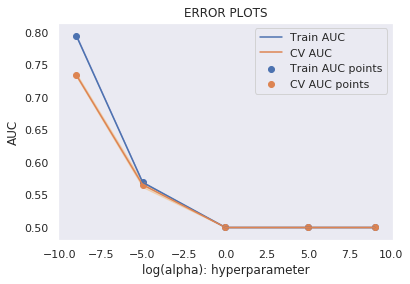

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
import math

neigh = SGDClassifier(loss='hinge', penalty='elasticnet', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-2, 10**0, 10**2, 10**4]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_m2_new, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

alpha = [10**-4, 10**-2, 10**0, 10**2, 10**4]
para1 = [math.log(x) for x in alpha]
para1 = [round(x) for x in para1]
plt.plot(para1, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(para1, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(para1, train_auc, label='Train AUC points')
plt.scatter(para1, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [138]:
para1

[-9, -5, 0, 5, 9]

In [139]:
# from the error plot we choose log(alpha) such that, we will have maximum AUC on cv data and gap between the train and cv is less
# for log(alpha) = -9.0 we will have maximum AUC on cv data and for which corresponding alpha is 10**-4
best_alpha = 10**-4

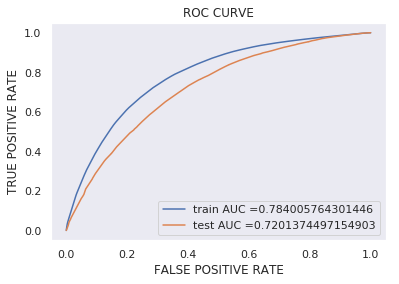

In [140]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

neigh = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=10**-4, class_weight = 'balanced')
neigh.fit(X_tr_m2_new, y_train)
clf_calibrated = CalibratedClassifierCV(neigh, cv='prefit', method='isotonic')
clf_calibrated.fit(X_tr_m2_new, y_train)

y_train_pred = clf_calibrated.predict_proba(X_tr_m2_new)[:,1]    
y_test_pred = clf_calibrated.predict_proba(X_te_m2_new)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC CURVE")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24958602089054502 for threshold 0.767


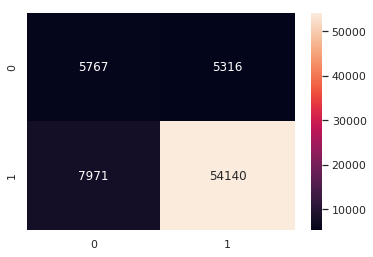

In [142]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
conf_mat_data = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.set(font_scale = 1.0)
sns.heatmap(conf_mat_data, annot=True, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24998448860950526 for threshold 0.517


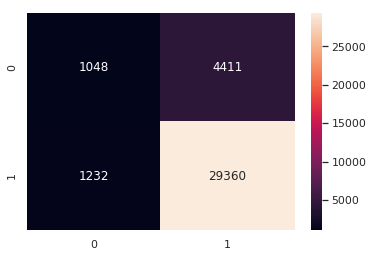

In [143]:
print("Test confusion matrix")
sns.set(font_scale = 1.0)
conf_mat_data = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(conf_mat_data, annot=True, fmt='g')

<h1>3. Conclusion</h1>

In [303]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Max_Depth", "Min_Samples_Split", "AUC"]

x.add_row(["set1(BOW)", "Decision Trees", 10, 10, 0.62])
x.add_row(["set2(TFIDF)", "Decision Trees", 10, 500, 0.62])
x.add_row(["set3(W2V)", "Decision Trees", 5, 500, 0.61])
x.add_row(["set4(TFIDFW2V)", "Decision Trees", 5, 500, 0.62])
print(x)

+----------------+----------------+-----------+-------------------+------+
|   Vectorizer   |     Model      | Max_Depth | Min_Samples_Split | AUC  |
+----------------+----------------+-----------+-------------------+------+
|   set1(BOW)    | Decision Trees |     10    |         10        | 0.62 |
|  set2(TFIDF)   | Decision Trees |     10    |        500        | 0.62 |
|   set3(W2V)    | Decision Trees |     5     |        500        | 0.61 |
| set4(TFIDFW2V) | Decision Trees |     5     |        500        | 0.62 |
+----------------+----------------+-----------+-------------------+------+


In [169]:
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter(alpha)", "AUC"]

x.add_row(["set5(Top 5k features)", "Linear SVM", 10**-4, 0.72])
print(x)

+-----------------------+------------+------------------------+------+
|       Vectorizer      |   Model    | Hyper Parameter(alpha) | AUC  |
+-----------------------+------------+------------------------+------+
| set5(Top 5k features) | Linear SVM |         0.0001         | 0.72 |
+-----------------------+------------+------------------------+------+
